# sử dụng Pandas và Seaborn thực hiện phân tích EDA cho dữ liệu bán hàng (supermarket_sales_vn.csv)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Đọc dữ liệu và in vài dòng đầu

df = pd.read_csv('sale_data_vn.csv')
print(df.head(5))

   Unnamed: 0   Invoice ID    City Customer type Gender  \
0           0  750-67-8428  Hà Nội        Member     Nữ   
1           1  226-31-3081  TP HCM        Normal     Nữ   
2           2  631-41-3108  Hà Nội        Normal    Nam   
3           3  123-19-1176  Hà Nội        Member    Nam   
4           4  373-73-7910  Hà Nội        Normal    Nam   

             Product line  Unit price  Quantity   Tax 5%    cogs   Total  \
0       Health and beauty       74.69         7  26.1415  522.83  548.97   
1  Electronic accessories       15.28         5   3.8200   76.40   80.22   
2      Home and lifestyle       46.33         7  16.2155  324.31  340.53   
3       Health and beauty       58.22         8  23.2880  465.76  489.05   
4       Sports and travel       86.31         7  30.2085  604.17  634.38   

      Date   Time      Payment  Rating  
0   1/5/19  13:08      Ewallet       6  
1   3/8/19  10:29         Cash       7  
2   3/3/19  13:23  Credit card       6  
3  1/27/19  20:33      E

## Số đơn: so sánh tổng đơn theo chi nhánh, nhóm hàng, giới tính khách hàng, phương thứcthanh toán (cột Payment)

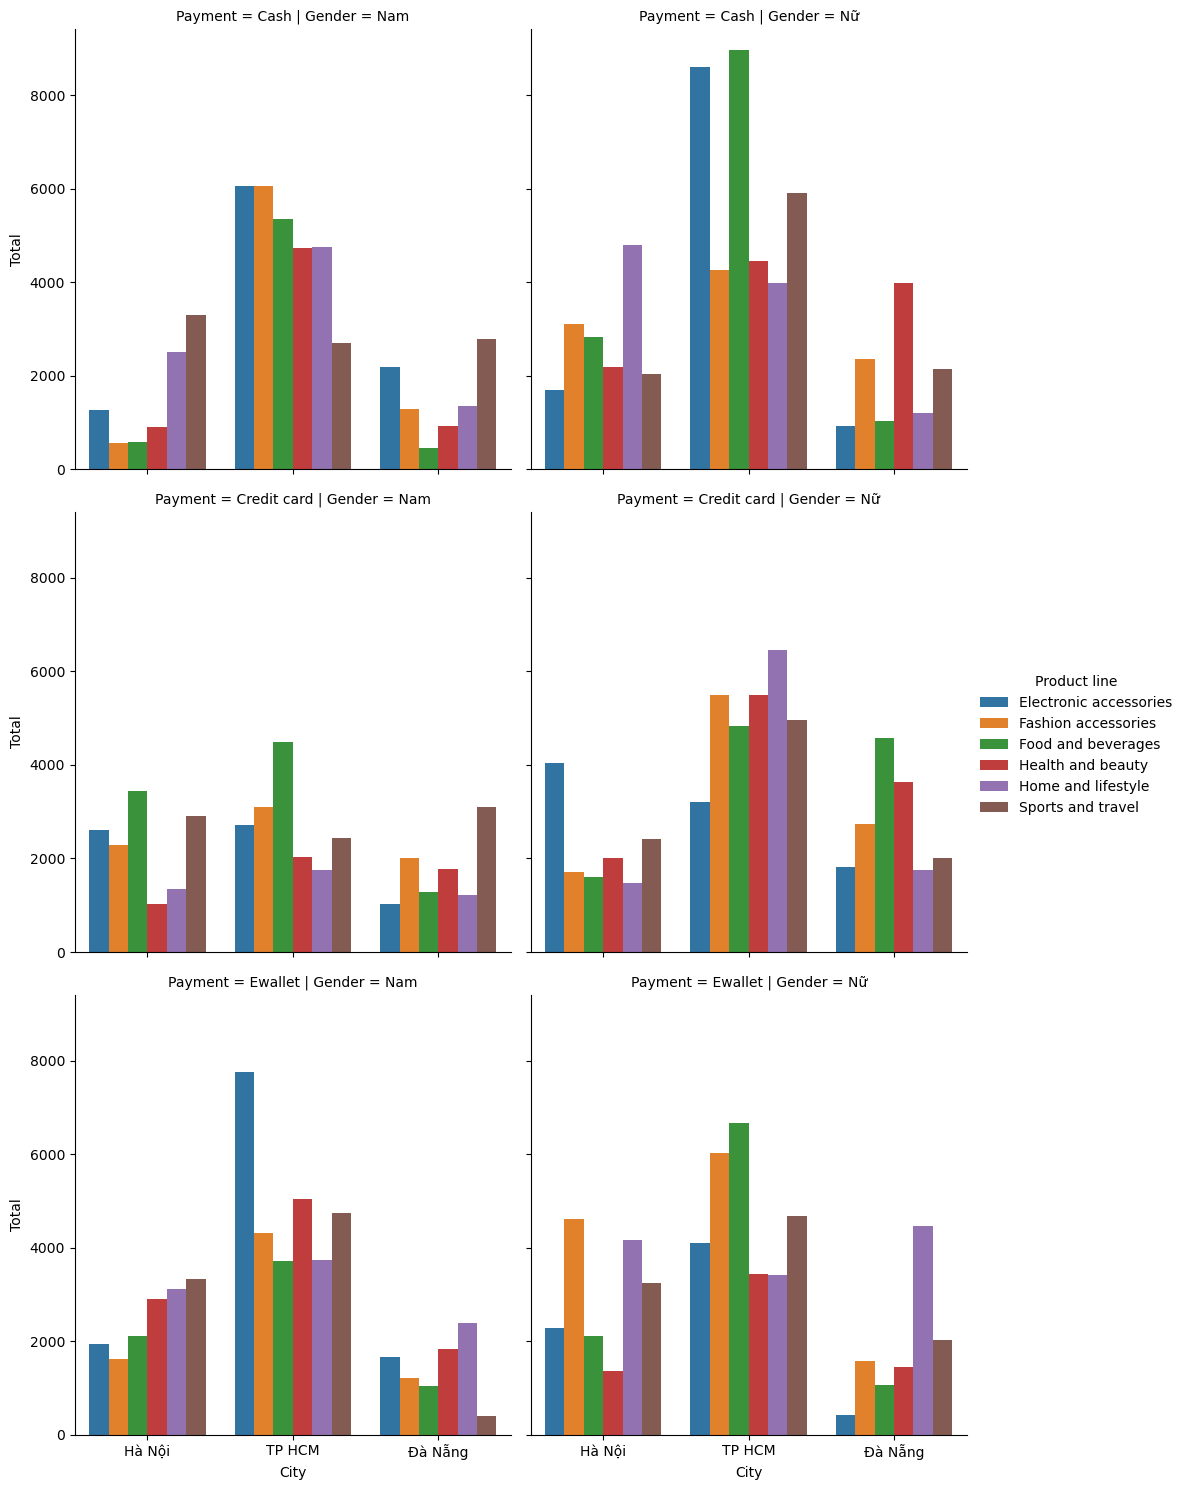

In [4]:
# tính tổng số đơn theo từng điều kiện
df_by_group = df.groupby(['City','Product line', 'Gender', 'Payment'])['Total'].sum().reset_index()

#Trực quan hóa dũ liệu kết quả
print(sns.catplot(x='City', y= 'Total', hue = 'Product line', col = 'Gender', row = 'Payment', kind = 'bar', 
                  data=df_by_group))

### làm từng biểu đồ


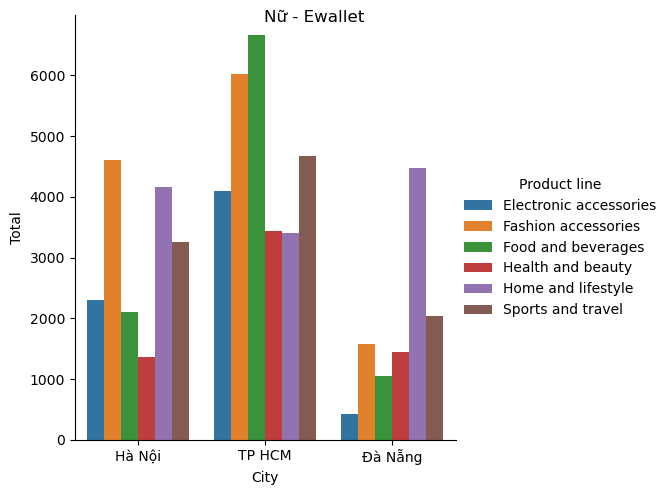

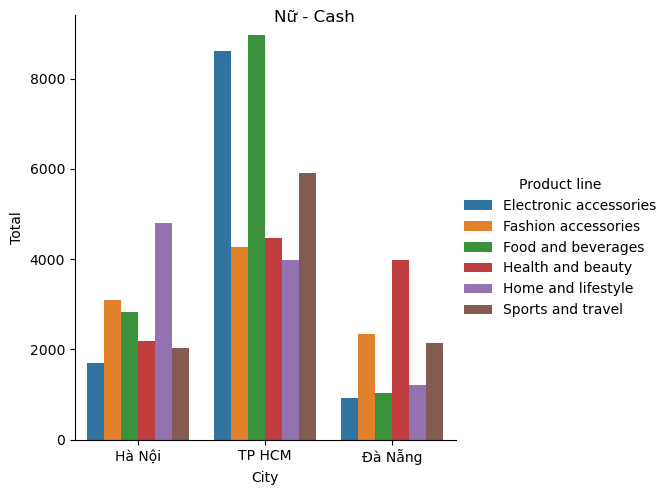

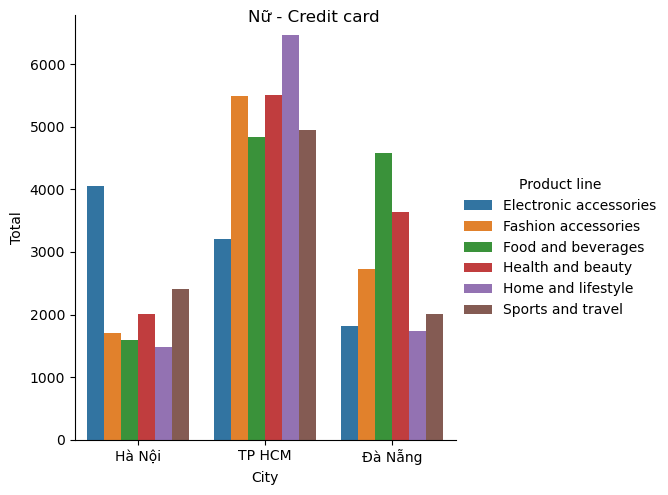

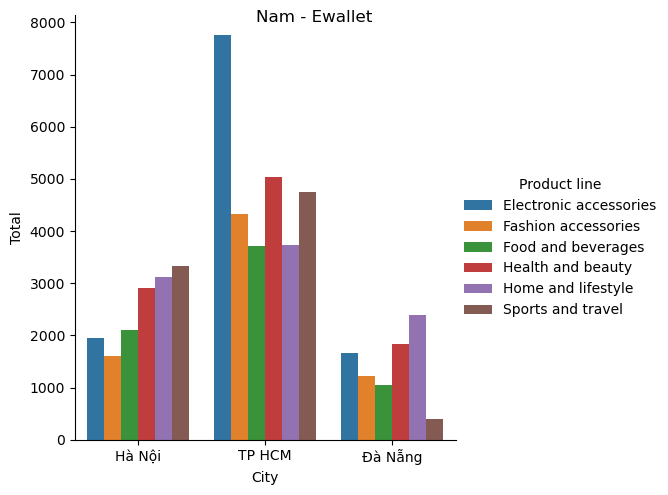

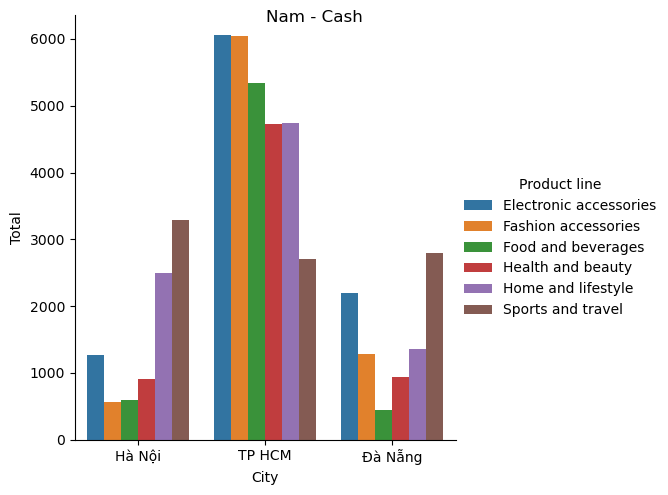

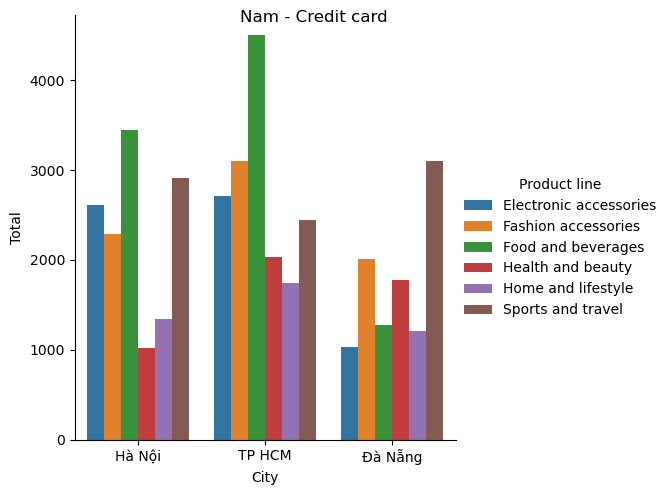

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lấy danh sách các giá trị unique của 'Gender' và 'Payment'
genders = df['Gender'].unique()
payments = df['Payment'].unique()

# Tạo các biểu đồ riêng lẻ cho từng cặp 'Gender' và 'Payment'
for gender in genders:
    for payment in payments:
        df_subset = df[(df['Gender'] == gender) & (df['Payment'] == payment)]
        df_by_group = df_subset.groupby(['City','Product line'])['Total'].sum().reset_index()
        plot = sns.catplot(x='City', y='Total', hue='Product line', kind='bar', data=df_by_group)
        plot.fig.suptitle(f'{gender} - {payment}')
       
        # Hiển thị biểu đồ
        plt.show()

## Mỗi đơn hàng có một số mặt hàng, vẽ phân bố số lượng đơn theo số mặt hàng (chẳng hạncác đơn hàng có 1,2,3... mặt hàng có số đơn là bao nhiêu?)

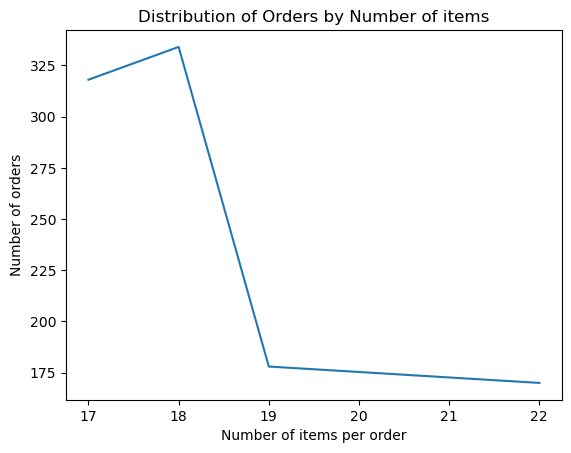

In [6]:
# Tính số lượng mặt hàng trong mỗi đơn hàng
items_per_order = df['Product line'].apply(lambda x:len(x))

# Tính số lượng mặt hàng trong mỗi đơn hàng
order_counts = items_per_order.value_counts()

# Vẽ biểu đồ 
sns.lineplot(x=order_counts.index, y=order_counts.values)
plt.xlabel('Number of items per order')
plt.ylabel('Number of orders')
plt.title('Distribution of Orders by Number of items')
plt.show()

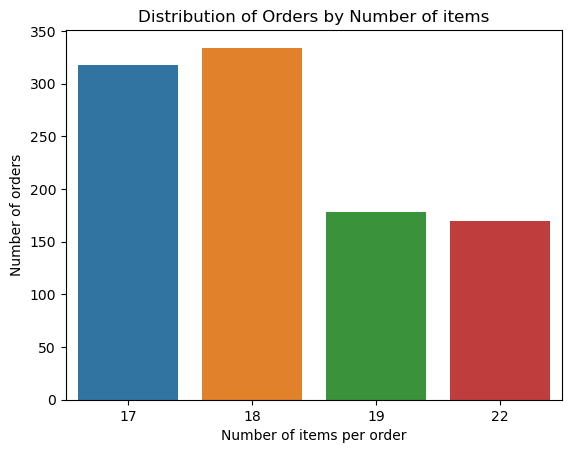

In [7]:
# Vẽ biểu đồ 
sns.barplot(x=order_counts.index, y=order_counts.values)
plt.xlabel('Number of items per order')
plt.ylabel('Number of orders')
plt.title('Distribution of Orders by Number of items')
plt.show()

## Thời gian: ngày nào bận rộn nhất tuần? thời điểm nào bận rộn nhất trong ngày?

2019-02-07
19
19


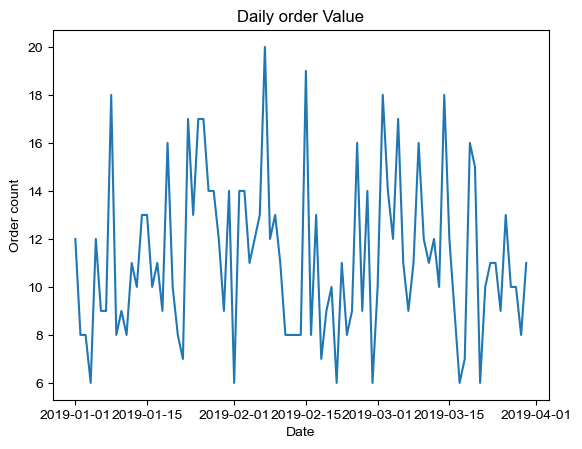

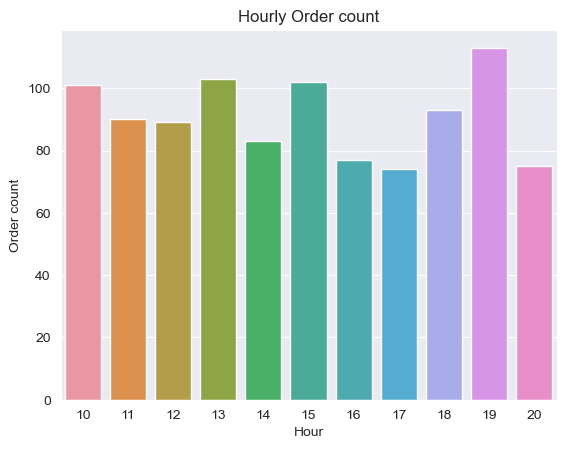

In [8]:
# Tạo cột datetime thư hai cột có sẵn
df['Datetime'] = pd.to_datetime(df['Date']+ ' ' +df['Time'])

# Chuyển đổi cột sang time pandas
df['datetime'] = pd.to_datetime(df['Datetime'])

#Trích xuất thông tin về ngày và giờ
df['Order Day'] = df['datetime'].dt.date
df['Order Hour'] = df['datetime'].dt.hour

# Tính số lượng đơn hàng và giá trị đơn hàng cho mỗi ngày và giờ
daily_order_count = df.groupby('Order Day')['Invoice ID'].nunique()
hourly_order_count = df.groupby('Order Hour')['Invoice ID'].nunique()
daily_order_value = df.groupby('Order Day')['Total'].sum()
hourly_order_value = df.groupby('Order Hour')['Total'].sum()

# Tìm ngày có số lượng đơn hàng cao nhất
max_order_day = daily_order_count.idxmax()

# Tìm giờ có số lượng đơn hàng cao nhất
max_order_hour = hourly_order_count.idxmax()

# Tìm giờ có giá trị đơn hàng cao nhất
most_valueable_hour = hourly_order_value.idxmax()

print(max_order_day)
print(max_order_hour)
print(most_valueable_hour)

# Vẽ biểu đồ 
sns.lineplot(x=daily_order_count.index, y=daily_order_count.values)
sns.set_style('darkgrid')
sns.set_palette("Set1")
plt.xlabel('Date')
plt.ylabel('Order count')
plt.title('Daily order Value')
plt.show()

sns.barplot(x=hourly_order_count.index, y=hourly_order_count.values)
sns.set_style('darkgrid')
sns.set_palette('pastel')
plt.xlabel('Hour')
plt.ylabel('Order count')
plt.title('Hourly Order count')
plt.show()

# Thiết lập kích thước biểu đồ trong hàm seaborn
sns.set(rc={'figure.figsize':(6, 8)})

## Doanh thu: tỷ lệ tổng doanh thu theo chi nhánh, nhóm hàng, giới tính khách hàng

In [9]:
# Tính cột doanh thu
df['Revenue'] = df['Quantity'] * df['Unit price']

print(df.head())

   Unnamed: 0   Invoice ID    City Customer type Gender  \
0           0  750-67-8428  Hà Nội        Member     Nữ   
1           1  226-31-3081  TP HCM        Normal     Nữ   
2           2  631-41-3108  Hà Nội        Normal    Nam   
3           3  123-19-1176  Hà Nội        Member    Nam   
4           4  373-73-7910  Hà Nội        Normal    Nam   

             Product line  Unit price  Quantity   Tax 5%    cogs   Total  \
0       Health and beauty       74.69         7  26.1415  522.83  548.97   
1  Electronic accessories       15.28         5   3.8200   76.40   80.22   
2      Home and lifestyle       46.33         7  16.2155  324.31  340.53   
3       Health and beauty       58.22         8  23.2880  465.76  489.05   
4       Sports and travel       86.31         7  30.2085  604.17  634.38   

      Date   Time      Payment  Rating            Datetime  \
0   1/5/19  13:08      Ewallet       6 2019-01-05 13:08:00   
1   3/8/19  10:29         Cash       7 2019-03-08 10:29:00   
2 

In [10]:
# Tính tổng doanh thu theo chi nhánh. nhóm hàng giới tính khách hàng
result = df.groupby(['Product line','City', 'Gender'])['Revenue'].sum().reset_index()

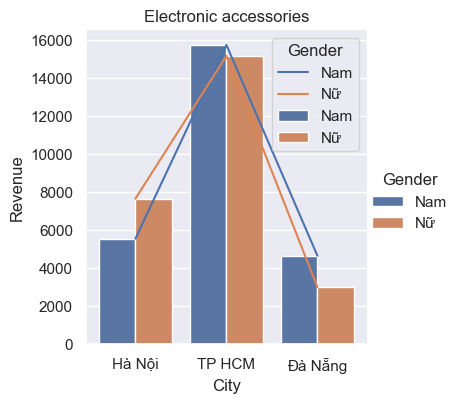

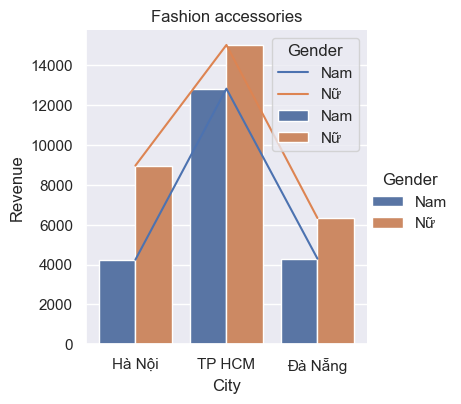

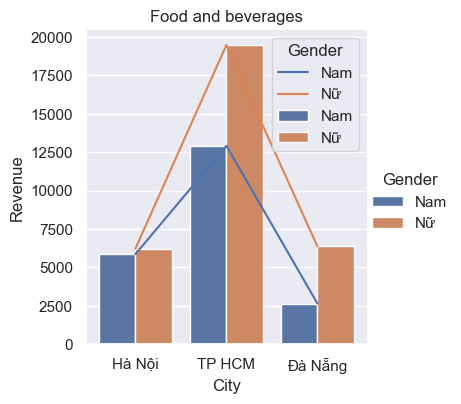

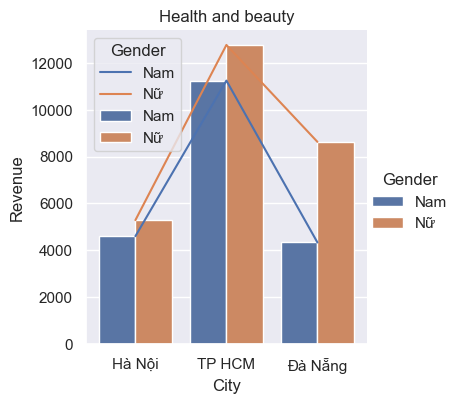

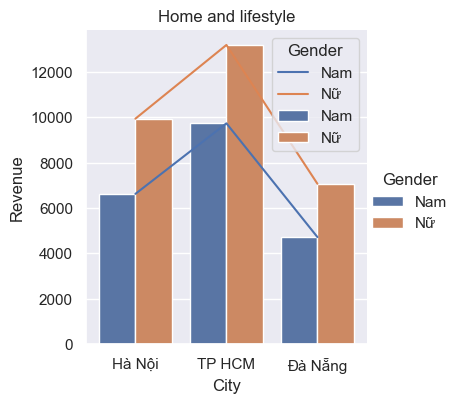

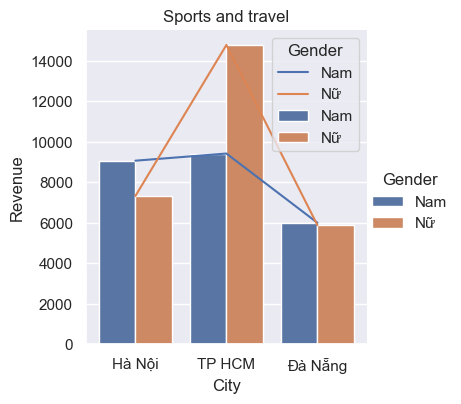

In [11]:
# Lặp qua các giá trị của cột "Product line"
for product in result['Product line'].unique():
# Lấy dữ liệu cho biểu đồ tương ứng với giá trị của "Product line"
    data = result[result['Product line'] == product]
# Vẽ biểu đồ
    sns.catplot(x='City', y='Revenue', hue='Gender', data=data, kind='bar', height=4)
    sns.lineplot(x='City', y='Revenue', hue='Gender', data=data, sort=False)
    
    plt.title(product)
    plt.show()

## Thuế

In [12]:
# Tính tổng thuế theo chi nhánh. nhóm hàng giới tính khách hàng
Tax = df.groupby(['Product line','City', 'Gender'])['Tax 5%'].sum().reset_index()

print(Tax)

              Product line     City Gender    Tax 5%
0   Electronic accessories   Hà Nội    Nam  277.5945
1   Electronic accessories   Hà Nội     Nữ  382.5920
2   Electronic accessories   TP HCM    Nam  786.7295
3   Electronic accessories   TP HCM     Nữ  757.9750
4   Electronic accessories  Đà Nẵng    Nam  232.6050
5   Electronic accessories  Đà Nẵng     Nữ  150.0055
6      Fashion accessories   Hà Nội    Nam  212.3130
7      Fashion accessories   Hà Nội     Nữ  448.5445
8      Fashion accessories   TP HCM    Nam  641.6875
9      Fashion accessories   TP HCM     Nữ  751.4950
10     Fashion accessories  Đà Nẵng    Nam  214.9675
11     Fashion accessories  Đà Nẵng     Nữ  316.9875
12      Food and beverages   Hà Nội    Nam  292.9270
13      Food and beverages   Hà Nội     Nữ  310.7235
14      Food and beverages   TP HCM    Nam  645.4620
15      Food and beverages   TP HCM     Nữ  973.7315
16      Food and beverages  Đà Nẵng    Nam  132.3965
17      Food and beverages  Đà Nẵng     Nữ  31

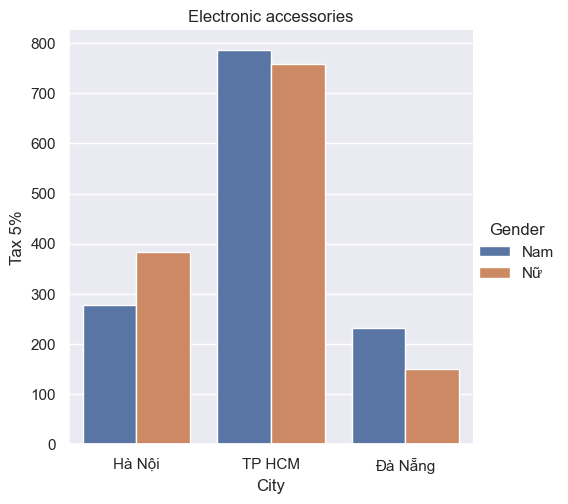

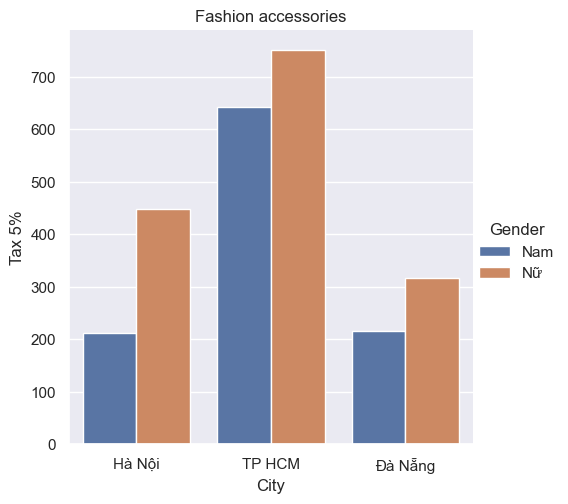

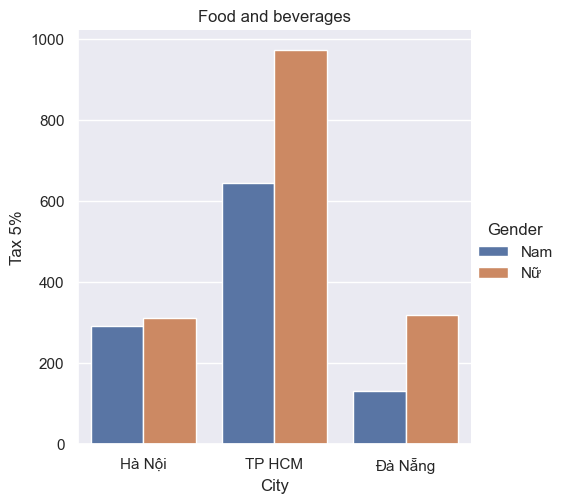

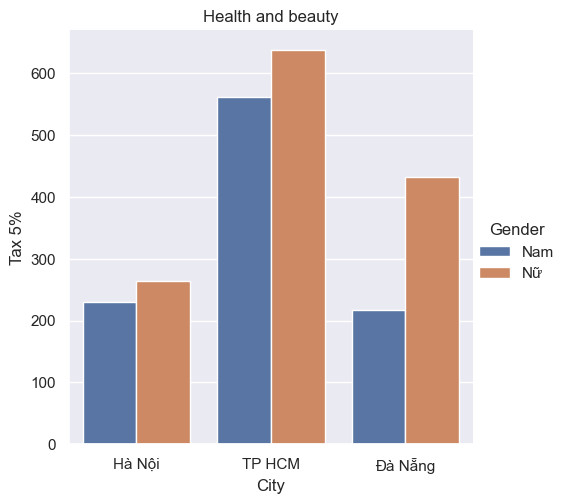

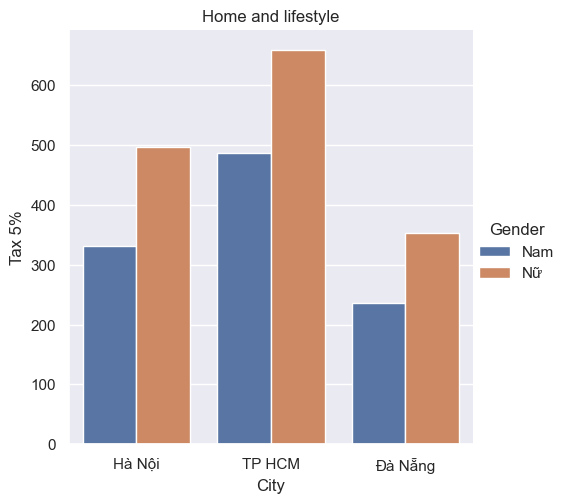

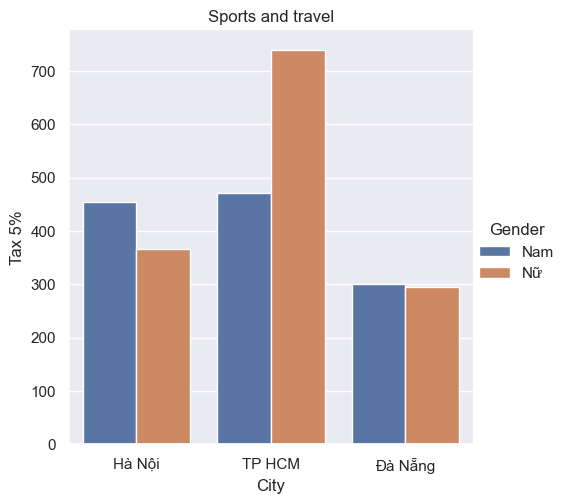

In [13]:
# Vẽ biểu đồ
for item in Tax['Product line'].unique():
    data_tax = Tax[Tax['Product line'] == item]
    sns.catplot(x='City', y='Tax 5%', hue='Gender', kind='bar', data=data_tax)
    plt.title(item)
    plt.show()

## Rating: so sánh rating giữa các nhóm hàng, giữa các ngày trong tuần, giới tính

In [14]:
df = df.rename(columns={'Date': 'Day'})

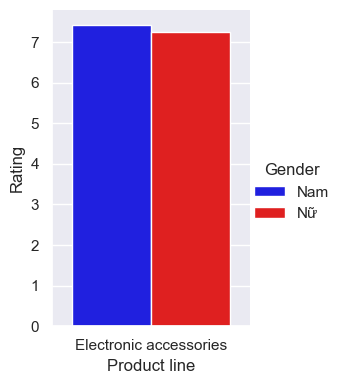

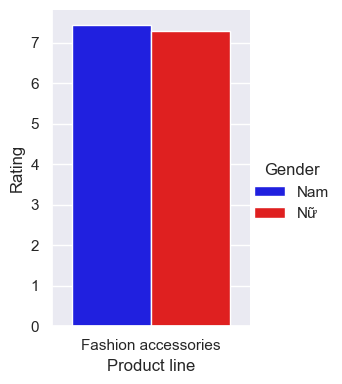

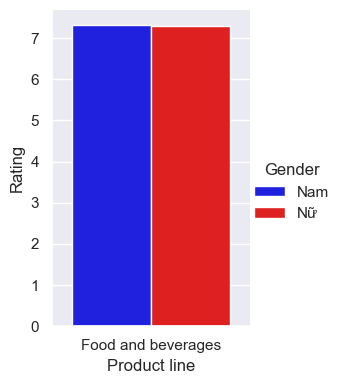

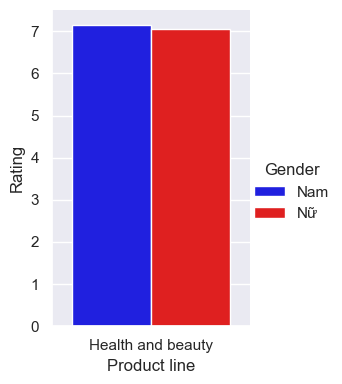

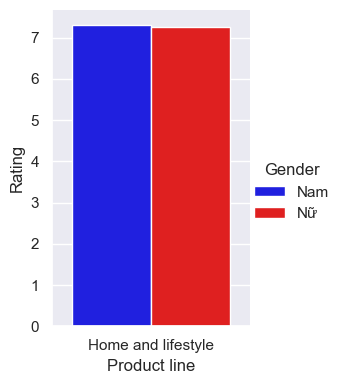

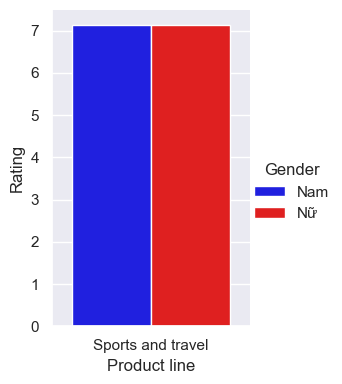

In [27]:
# Tính giá trị trung bình của rating theo các nhóm hàng
rate = df.groupby(['Product line', 'Gender'], as_index=False)['Rating'].mean()

# Tạo danh sách màu cho từng nhóm giới tính
gender_colors = {"Nam": "blue", "Nữ": "red"}

for item in rate['Product line'].unique():
    data_rate = rate[rate['Product line'] == item]
    sns.catplot(x='Product line', y='Rating', kind='bar', hue='Gender', data=data_rate, height=4, aspect=.7, palette=gender_colors)

    plt.show()

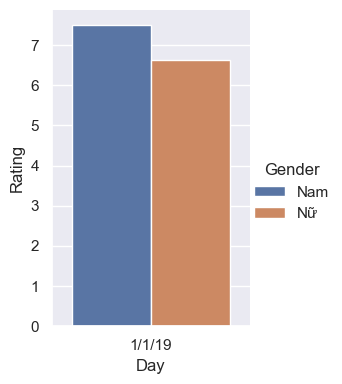

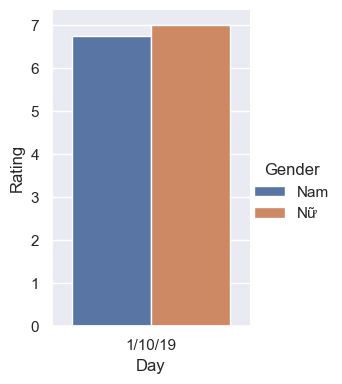

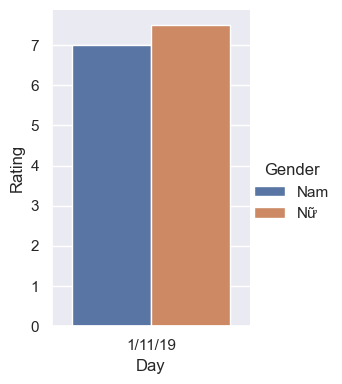

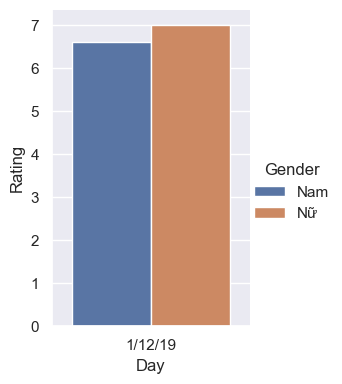

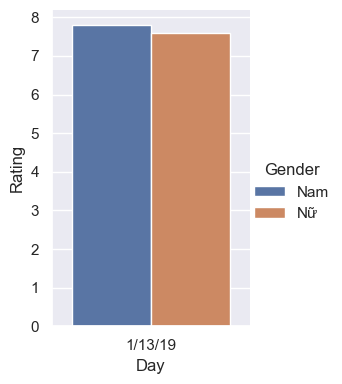

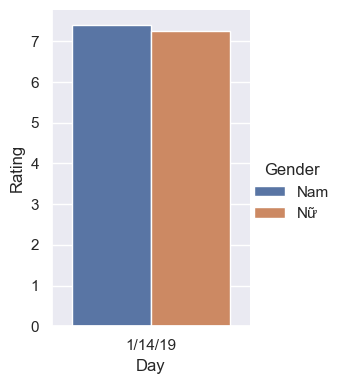

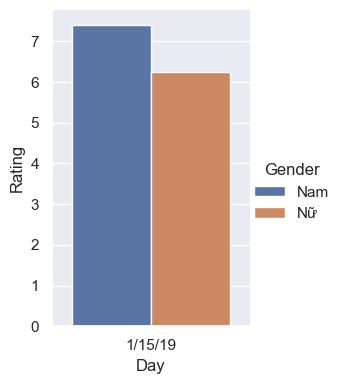

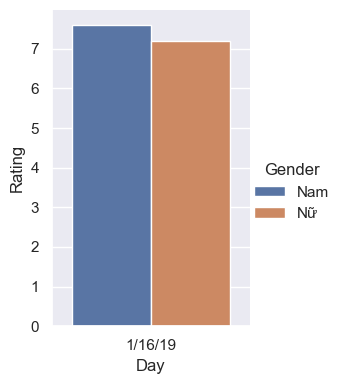

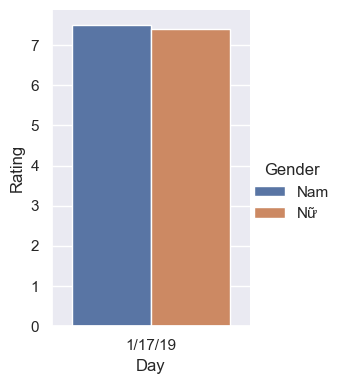

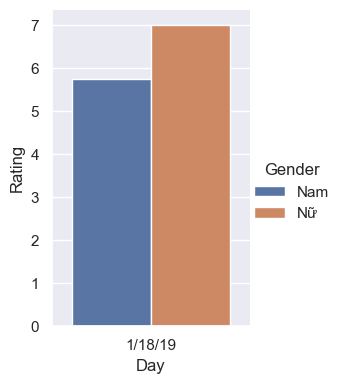

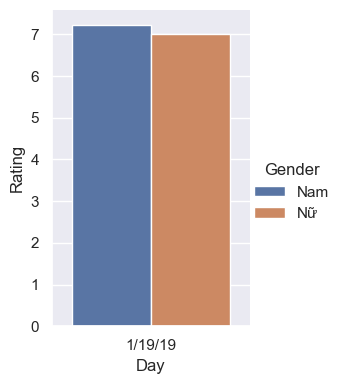

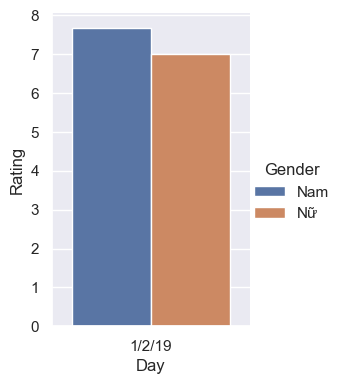

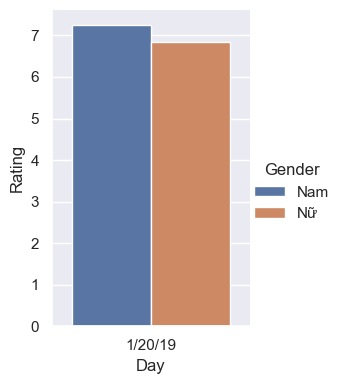

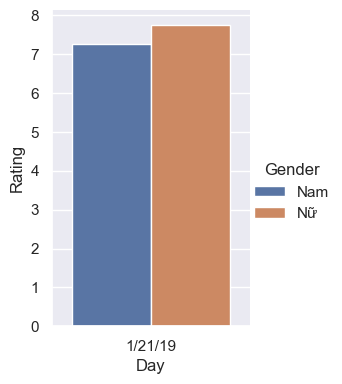

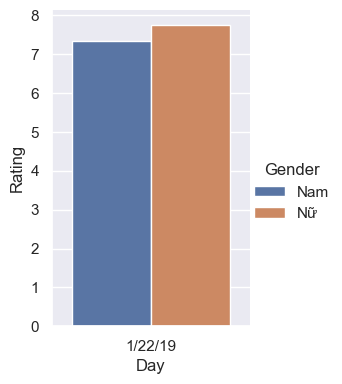

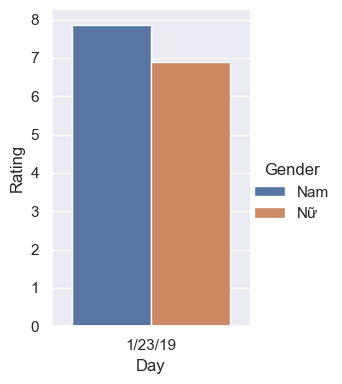

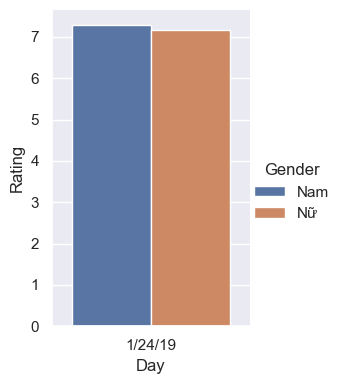

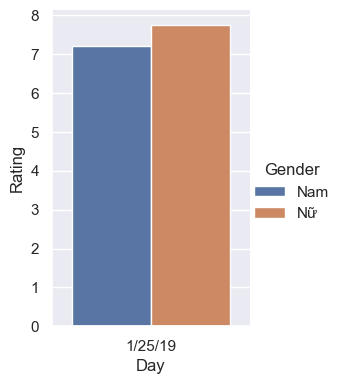

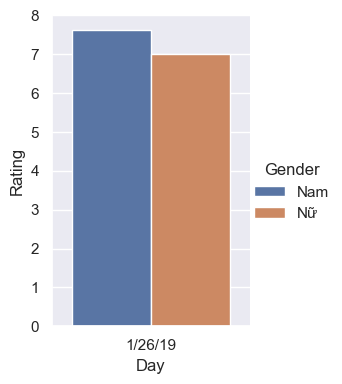

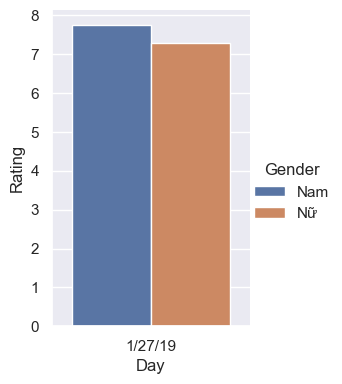

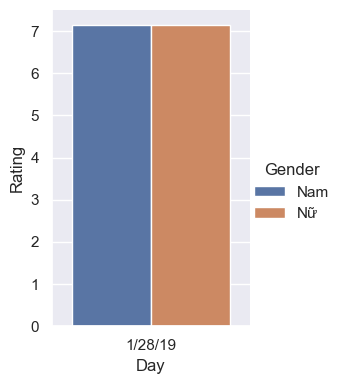

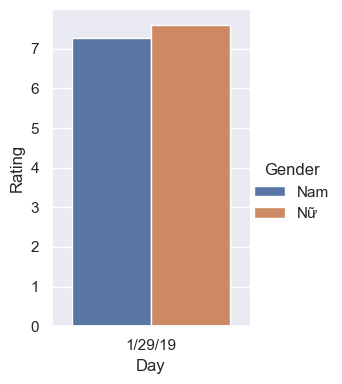

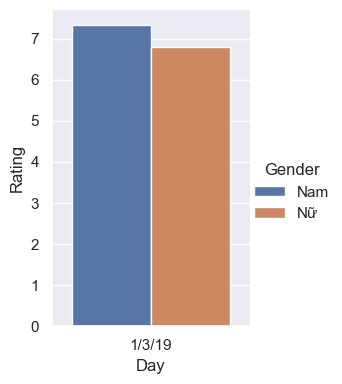

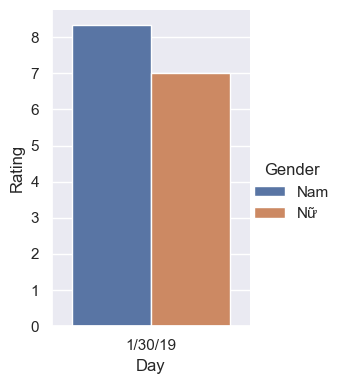

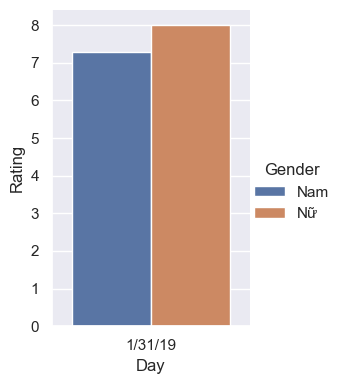

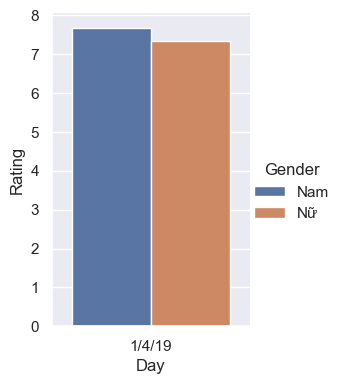

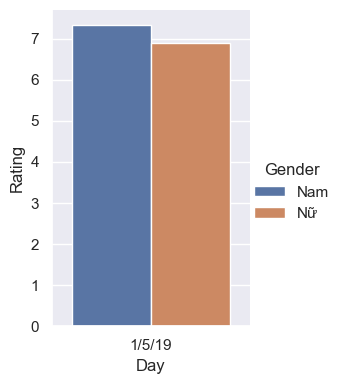

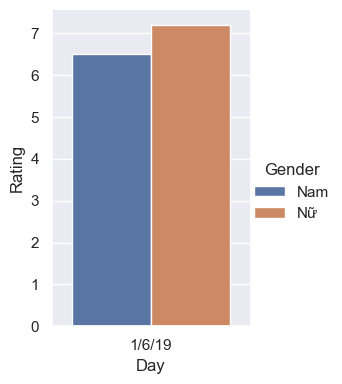

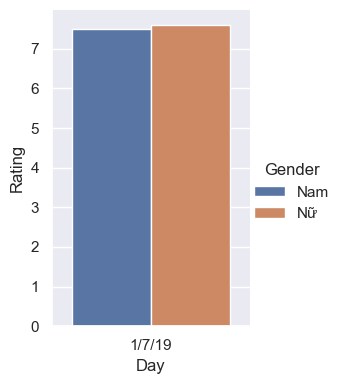

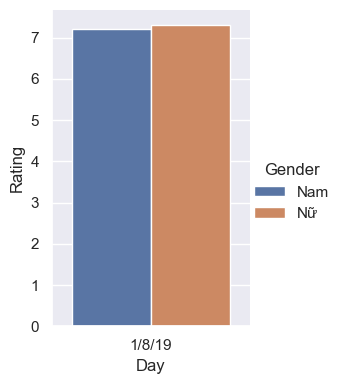

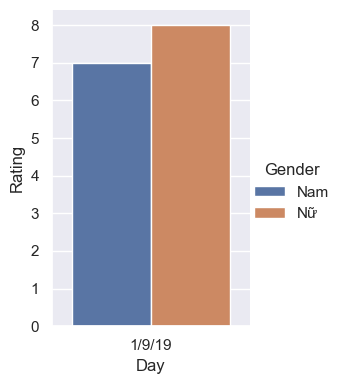

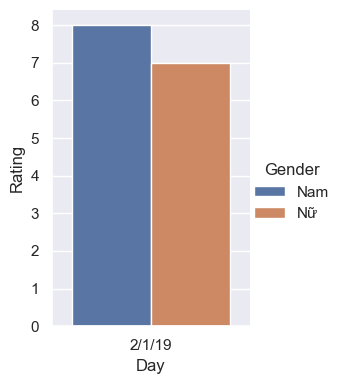

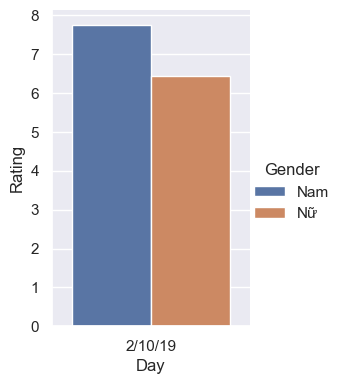

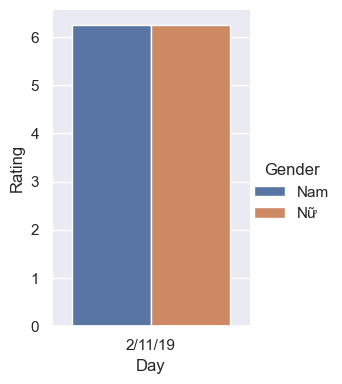

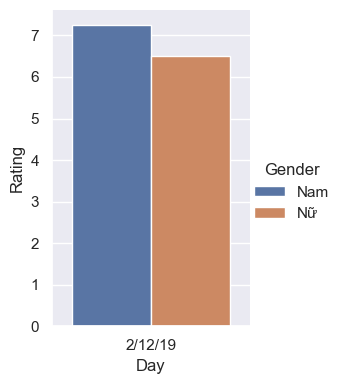

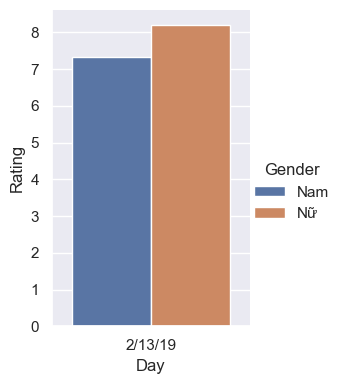

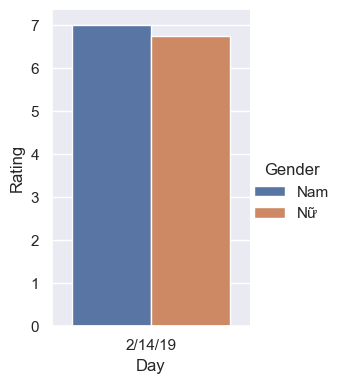

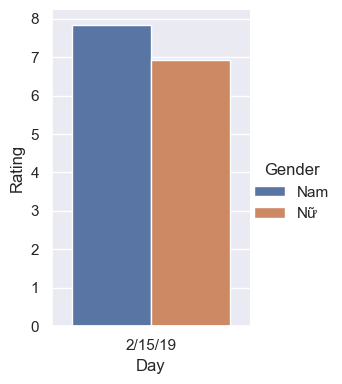

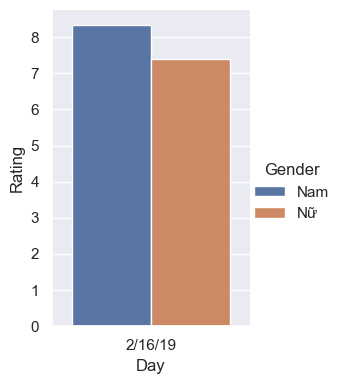

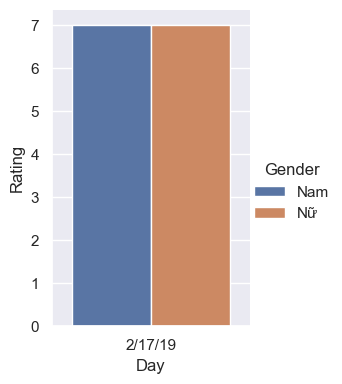

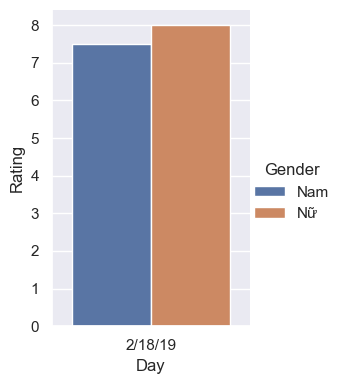

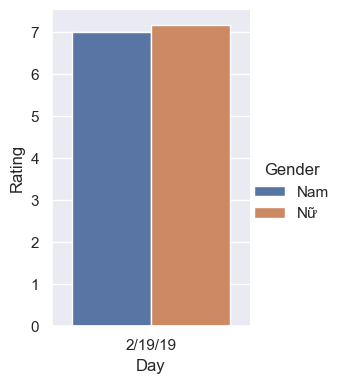

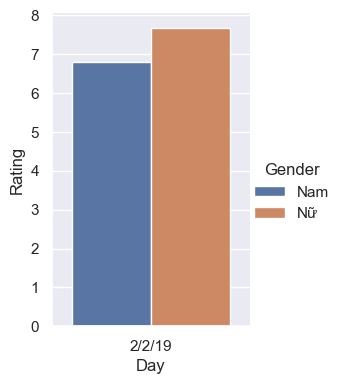

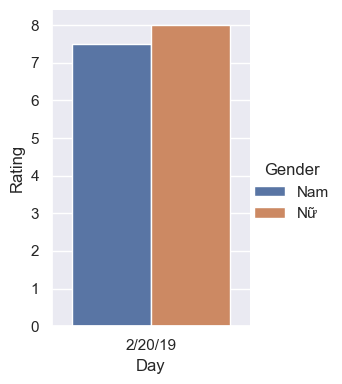

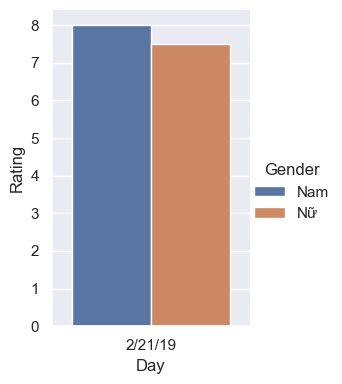

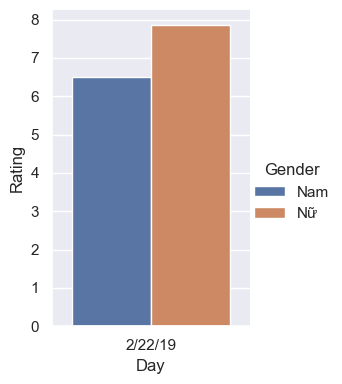

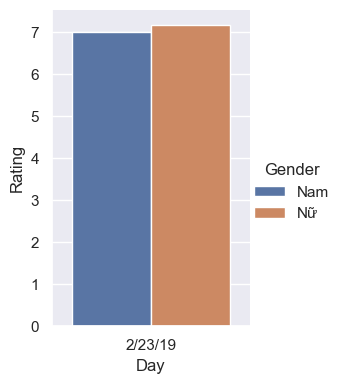

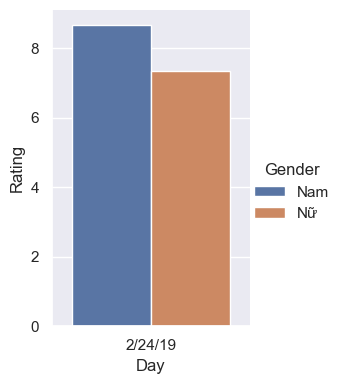

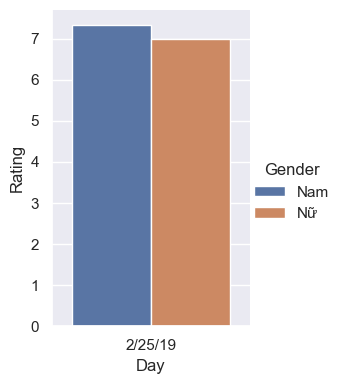

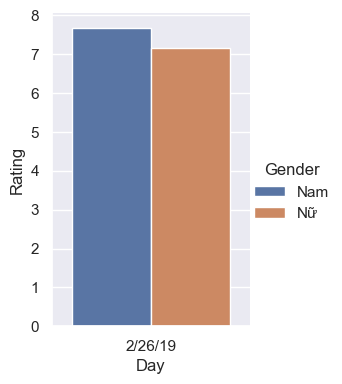

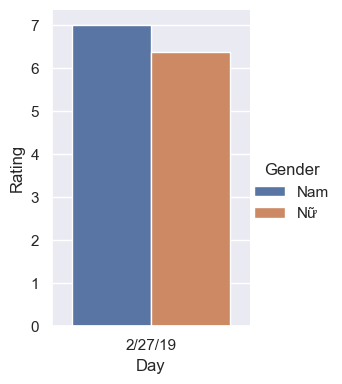

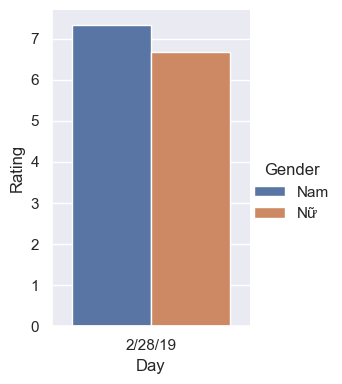

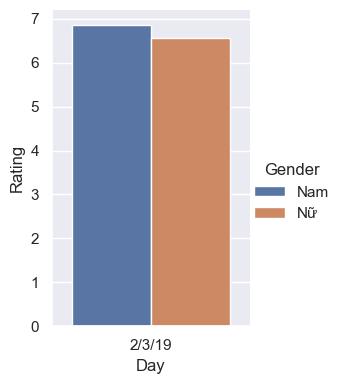

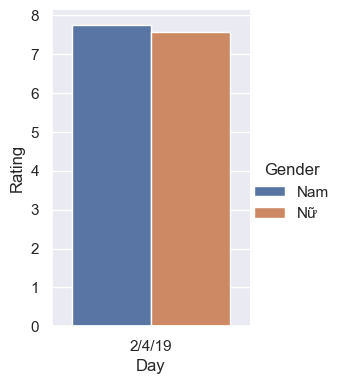

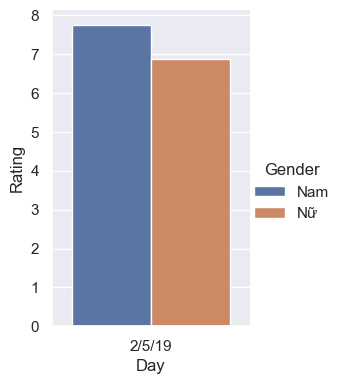

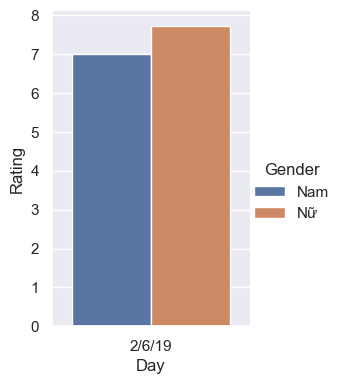

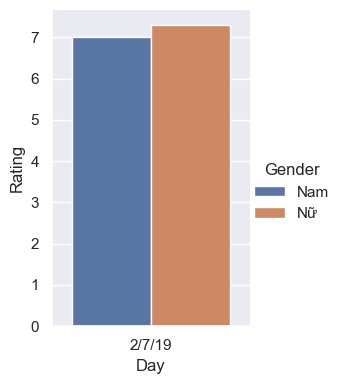

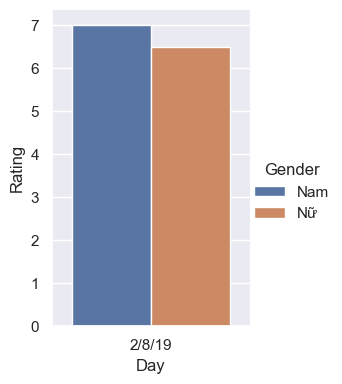

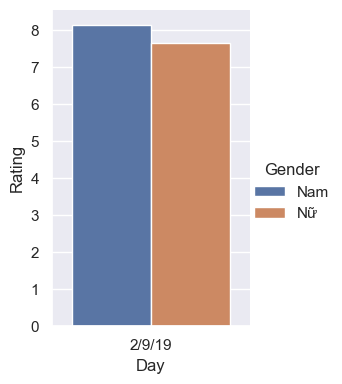

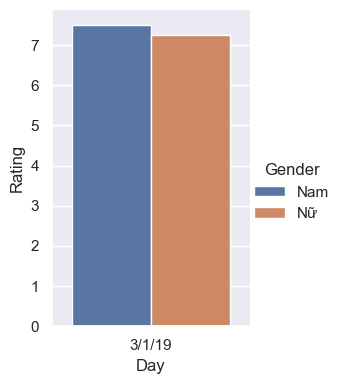

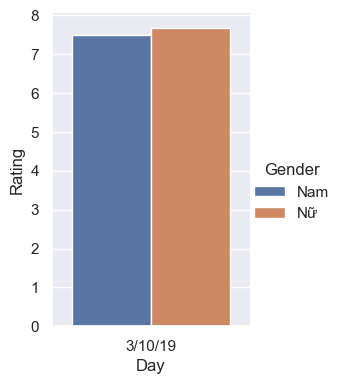

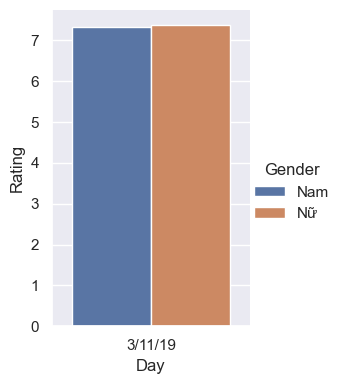

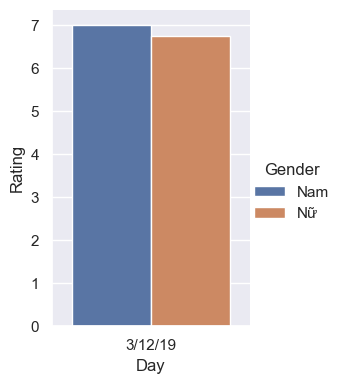

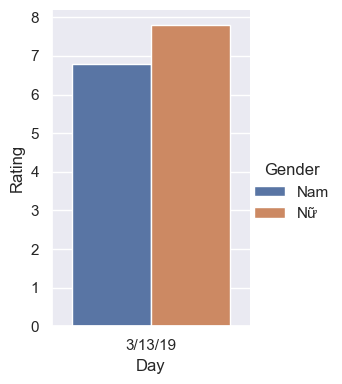

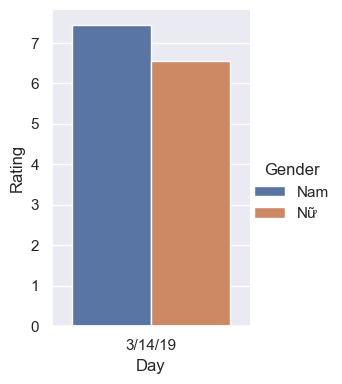

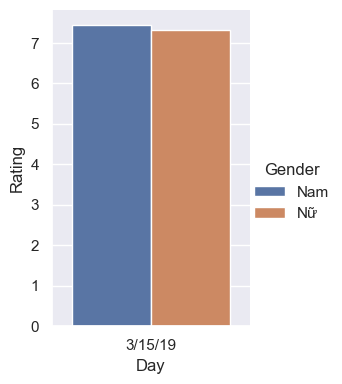

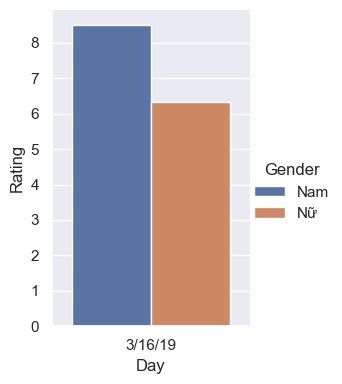

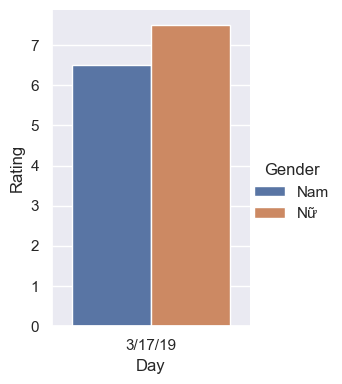

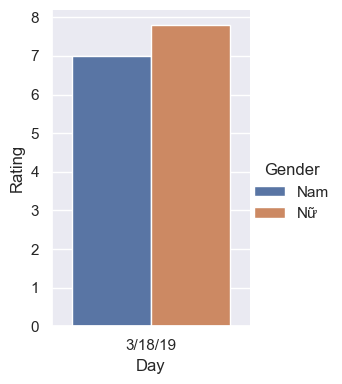

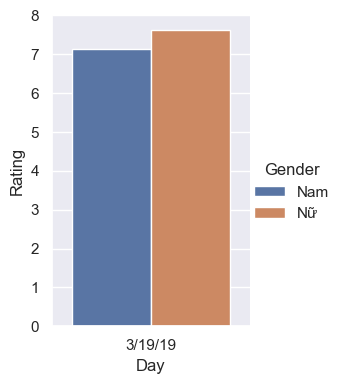

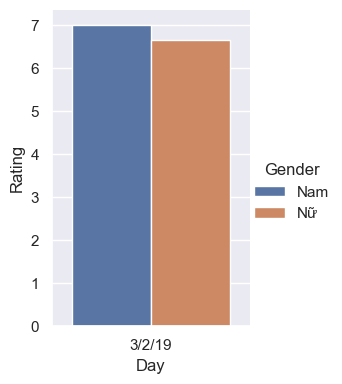

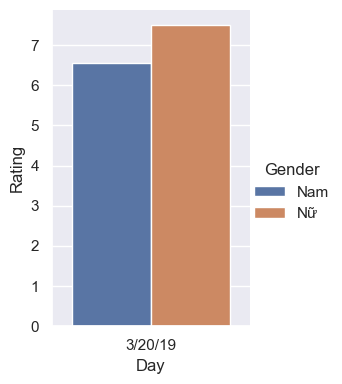

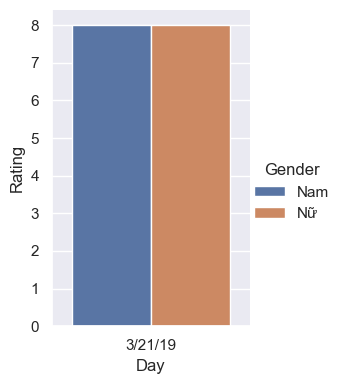

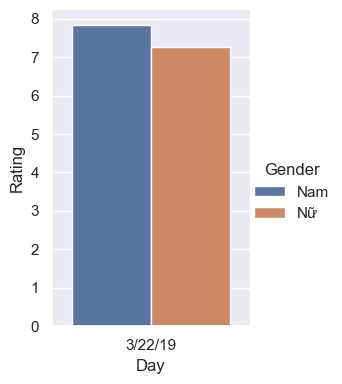

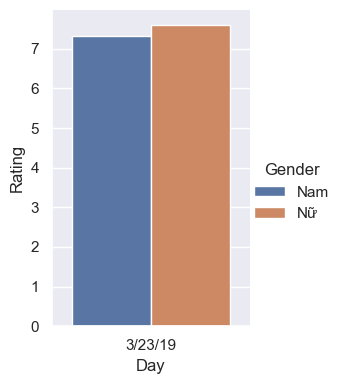

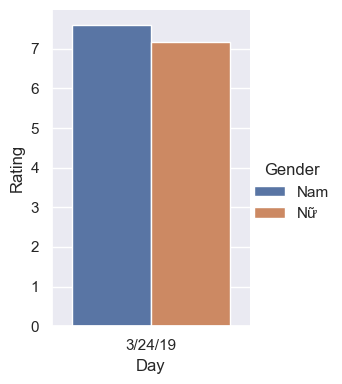

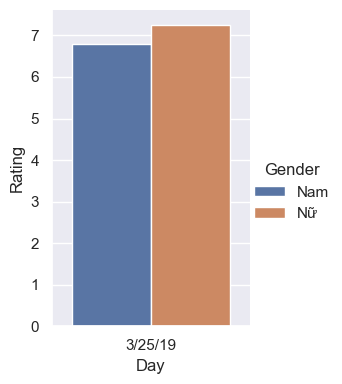

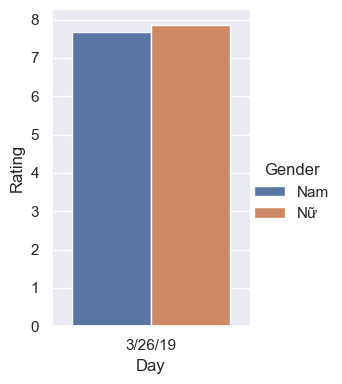

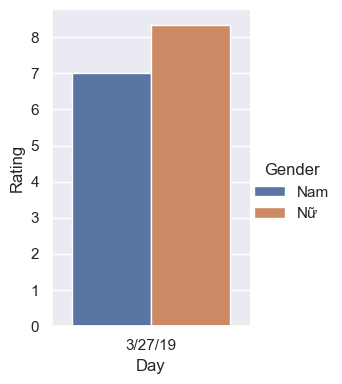

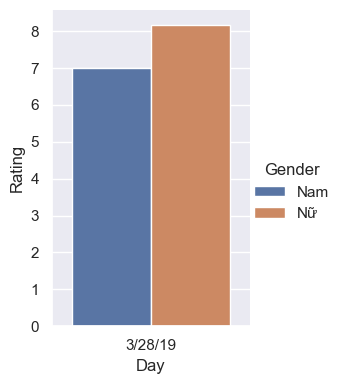

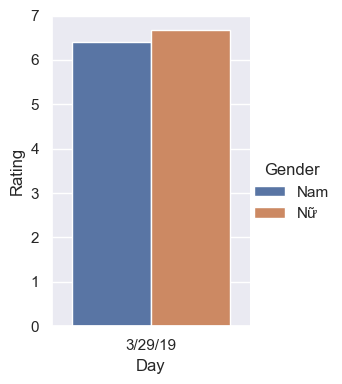

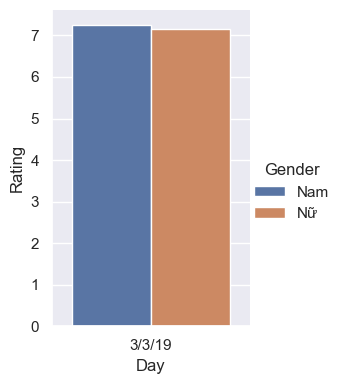

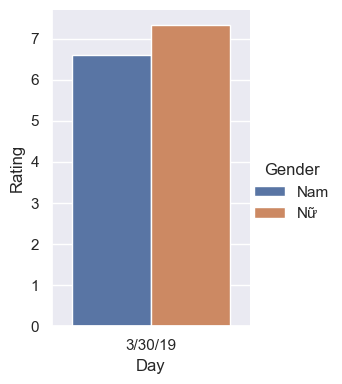

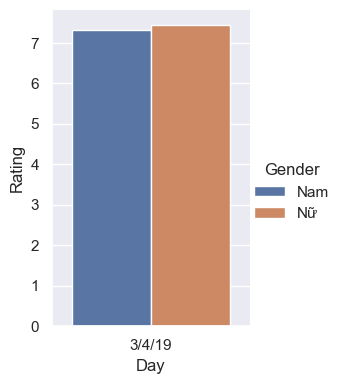

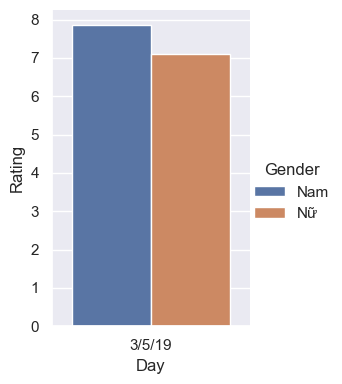

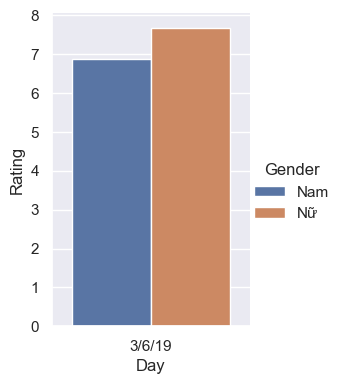

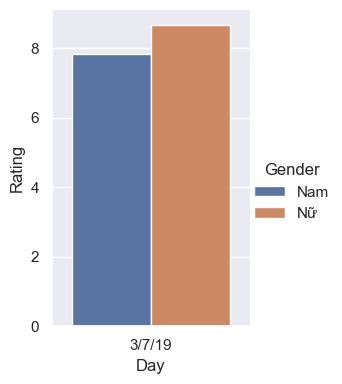

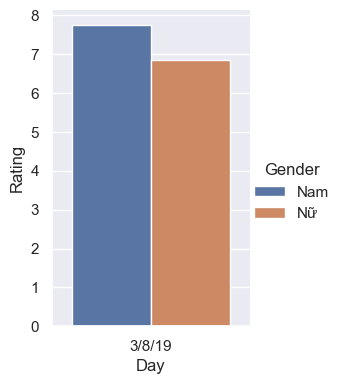

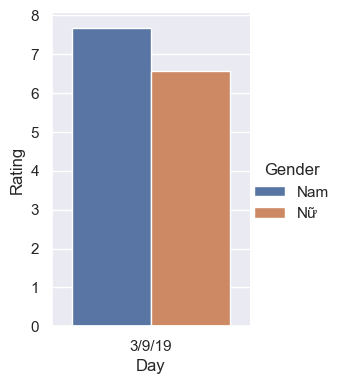

In [34]:
# Tính giá trị trung bình của rating giữa các ngày trong tuần
date = df.groupby(['Day', 'Gender'])['Rating'].mean().reset_index()


for item in date['Day'].unique():
    data_rate = date[date['Day'] == item]
    sns.catplot(x='Day', y='Rating', kind='bar', hue='Gender', data=data_rate, height=4, aspect=.7)

    plt.show()

In [52]:
print(df.columns)

Index(['Unnamed: 0', 'Invoice ID', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'cogs', 'Total',
       'Day', 'Time', 'Payment', 'Rating', 'Datetime', 'datetime', 'Order Day',
       'Order Hour', 'Revenue'],
      dtype='object')


In [55]:
# Tạo ra datafram mới
df_new = df.drop('Unnamed: 0', axis=1, inplace=False)

print(df_new)

      Invoice ID     City Customer type Gender            Product line  \
0    750-67-8428   Hà Nội        Member     Nữ       Health and beauty   
1    226-31-3081   TP HCM        Normal     Nữ  Electronic accessories   
2    631-41-3108   Hà Nội        Normal    Nam      Home and lifestyle   
3    123-19-1176   Hà Nội        Member    Nam       Health and beauty   
4    373-73-7910   Hà Nội        Normal    Nam       Sports and travel   
..           ...      ...           ...    ...                     ...   
995  233-67-5758   TP HCM        Normal    Nam       Health and beauty   
996  303-96-2227  Đà Nẵng        Normal     Nữ      Home and lifestyle   
997  727-02-1313   TP HCM        Member    Nam      Food and beverages   
998  347-56-2442   Hà Nội        Normal    Nam      Home and lifestyle   
999  849-09-3807   Hà Nội        Member     Nữ     Fashion accessories   

     Unit price  Quantity   Tax 5%    cogs    Total      Day   Time  \
0         74.69         7  26.1415  522.

C:\Users\Admin\AppData\Local\Temp\ipykernel_25456\3982779637.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_new.corr()


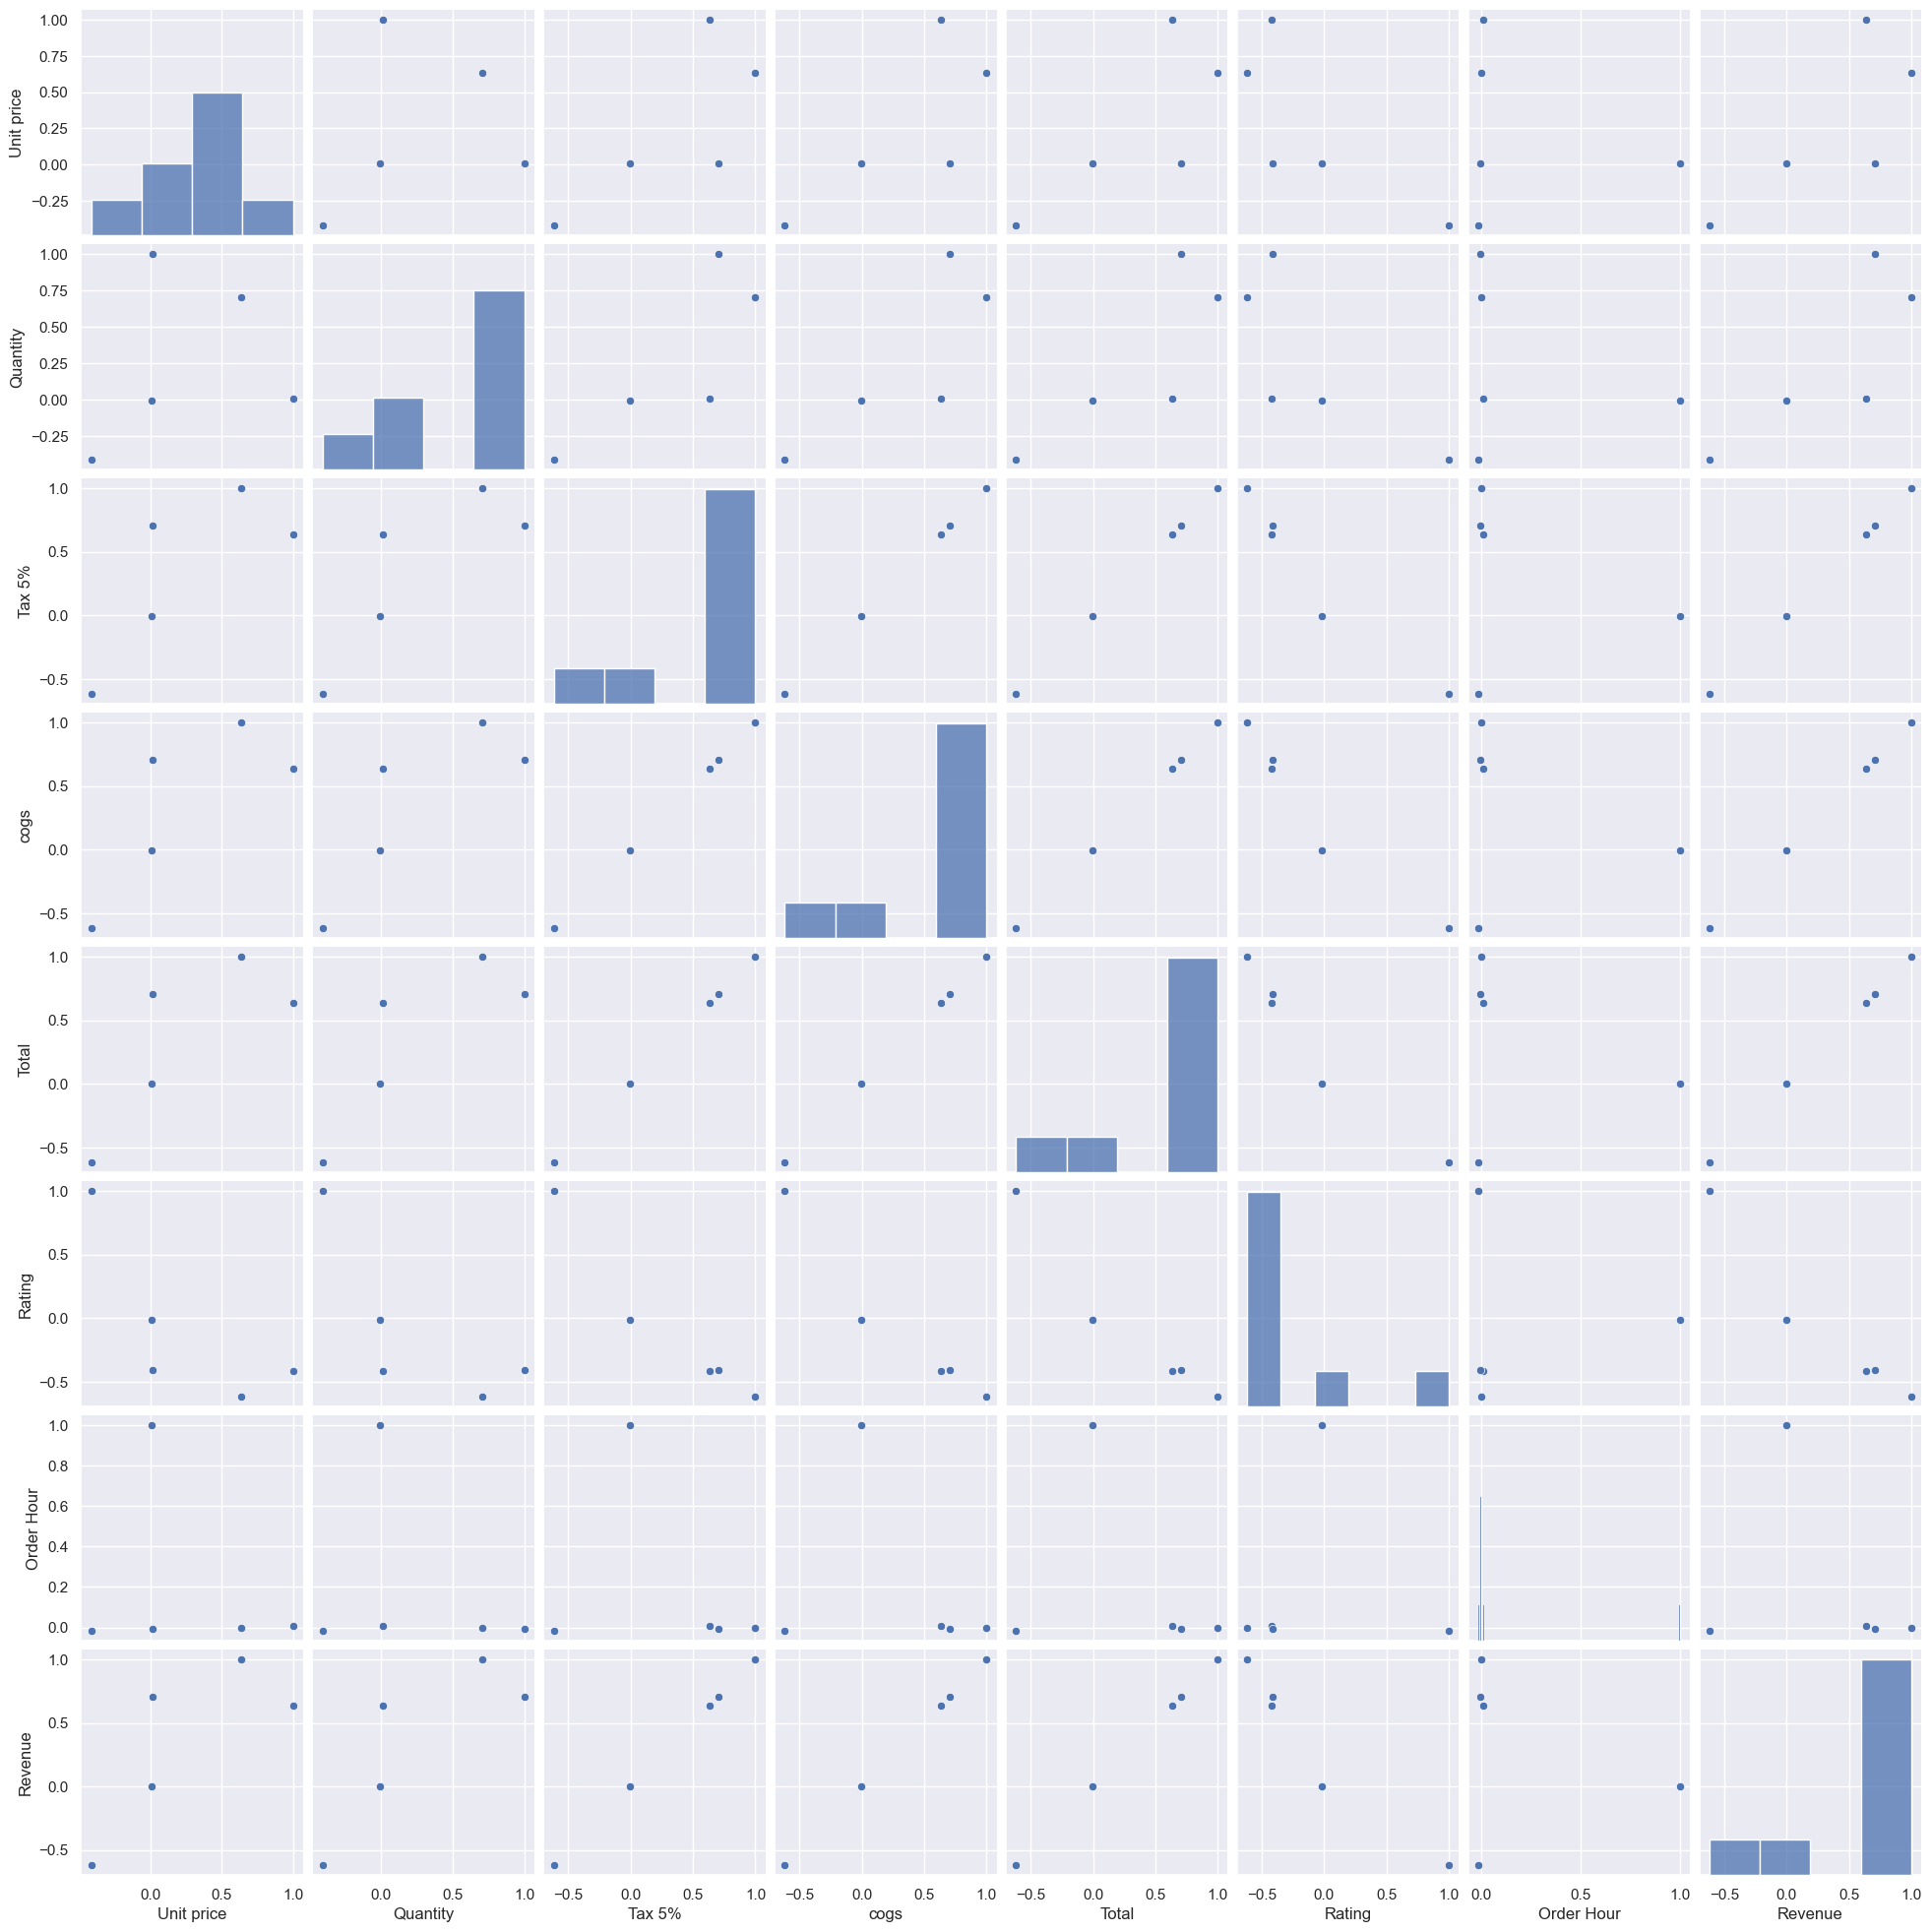

In [59]:
# Tính toán ma trận tương quan
corr_matrix = df_new.corr()

# Vẽ biểu đồ heatmap cho ma trận tương quan
sns.pairplot(corr_matrix)
plt.show()

# Comment 

In [2]:
#Bài tập: Sử dụng Pandas và Seaborn thực hiện phân tích EDA cho dữ liệu bán hàng (supermarket_sales_vn.csv)
#Mô tả: Bài tập yêu cầu tôi thực hiện phân tích EDA cho dữ liệu bán hàng bằng cách sử dụng Pandas và Seaborn. Tôi đã tiếp cận bài tập bằng cách trích xuất và khám phá dữ liệu, thực hiện các thống kê mô tả và trực quan hóa dữ liệu bằng các biểu đồ và đồ thị.
#Kết quả: Tôi đã tạo ra các biểu đồ và đồ thị sử dụng Seaborn để trực quan hóa các mối quan hệ giữa các biến trong dữ liệu bán hàng. Ví dụ: biểu đồ phân phối của giá trị đơn hàng, biểu đồ tương quan giữa giá trị đơn hàng và số lượng sản phẩm. Tôi cũng đã tạo ra các bảng dữ liệu và thống kê mô tả để mô tả các đặc điểm của dữ liệu.